# Tutorial on POWER SYSTEM MACHINE LEARNING APPLICATIONS for IEEE SmartGridComm2020 11-13 November

Prepared by Dr. Tetiana Bogodorova, Rensselaer Polytechnic Institute, bogodt2@rpi.edu

Based on Tetiana Bogodorova, Denis Osipov, and Luigi Vanfretti. "Automated Design of Realistic Contingencies for Big Data Generation." IEEE Transactions on Power Systems (2020).

## Fault Clearing Time Sampling

Draw samples from the Gamma distribution:
${\Large p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}}$ (1),
$k$ - shape, $\theta$ - scale

In [21]:
import numpy as np
shape, scale = 1.36, 1/0.18
s = np.random.gamma(shape, scale, 1000)

Display the histogram of the samples, along with the probability density function:

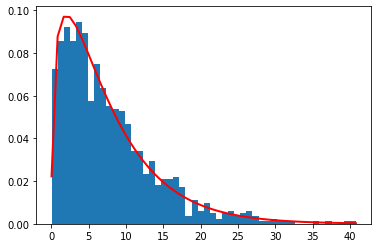

In [22]:
import matplotlib.pyplot as plt
import scipy.special as sps
%matplotlib inline

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

Since  the  minimum  fault  clearance  timeis  equal  to 3 cycles,  the  obtained  probability  density  (1)  is shifted by 3 cycles.

In [23]:
s=s+3

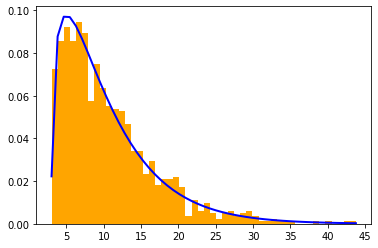

In [27]:
count, bins_sh, ignored = plt.hist(s, 50, density=True, color='orange')
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins+3, y, linewidth=2, color='blue')  
plt.show()

## Fault Type Sampling

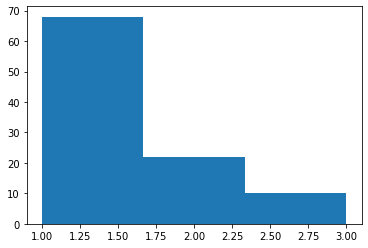

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

pr=(0.7, 0.2, 0.1)
xk = np.arange(1, 4)
    
custm = stats.rv_discrete(name='custm', values=(xk, pr))

Ns=100
R = custm.rvs(size=Ns)
M = max(R)

# Plot histogram of sampled elements

plt.hist(R, bins=M)
plt.show()

## Sampling the number of elements in a contingency

The  frequency  of  outages  in  the  reliability  criteria  for  afacility  in  the  Western  Interconnection: 1 element with frequency 0.33 1/year, 2 elements with 0.033 1/year, more than 2 elements with 0.0033 1/year.
Thus, the probability of a contingency being $n−k$ and $n$ follows the geometric distribution with the limited support:
$\Large {\begin{equation}
 p(k) = \left\{ 
  \begin{array}{l l}
    \frac{m-1}{m^k} & \quad \text{if } k<n\\
    1-\sum\limits_{i=1}^{n-1} \frac{m-1}{m^i} & \quad \text{if }k=n\end{array} \right.
\label{geometricpmf}
\end{equation}}$

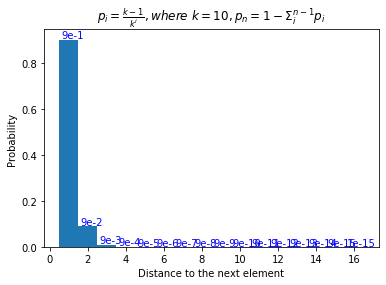

In [29]:
from decimal import Decimal
def make_pdf(k, n):
    """Return a probability p(n) := k-1/k^n."""
    def pdf(n):
        numer = k-1
        denom = k**n
        return numer / denom
    if n==0 or n==1:
        pr=[1]
    else:
        pr=[pdf(i) for i in range(1,n)]
        pr.append(1-sum(pr))
    return tuple(pr)
def plot_dist(k,n, flag, Ns):
    if flag==1:
        l=n+1
        s=0
    elif flag==0:
        l=n
        s=1
    else:
        return print("flag can be equal one or zero")
    pr=make_pdf(k,n)
    if n==0:
        xk = np.array([flag])
    else:
        xk = np.arange(flag, l)
    #print(xk)
    #print(pr)
    custm = stats.rv_discrete(name='custm', values=(xk, pr))
    R = custm.rvs(size=Ns)
    M = max(R)+s
    # Plot histogram of sampled elements
    #plt.hist(R, bins=M)
    # Plot bar plot
    x=list(range(1, n+1))
    fig, ax = plt.subplots()
    ax.bar(x, pr, width=1)
    plt.xlabel('Distance to the next element') #('Number of elements')
    plt.ylabel('Probability')
    pr_str=[]
    pr_str=['{:.0e}'.format(Decimal(str(i))) for i in pr]
    for i, v in enumerate(pr_str):
        ax.text(i+0.6,float(v)+0.005, v, color='blue', fontsize=10) #+0.045
    plt.title(r'$p_i = \frac{k-1}{k^i}, where\ k = 10, p_n=1- \Sigma_i^{n-1} p_i$')
    return plt.show()
el=16 #Number of edges for Kundur 2 area system
k=10
N_d=1000
plot_dist(k,el, 1, N_d)

## Graph Theory for Power System Analysis

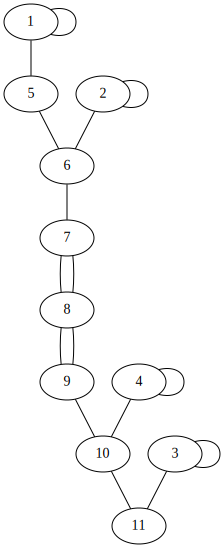

In [56]:
import networkx as nx
import graphviz
from networkx.drawing.nx_agraph import to_agraph

# Edges to build a graph of Kundur 2 area system
conlist = [(1, 1), (2, 2), (3, 3), (4, 4), (1, 5), (5, 6), (6, 7), (2, 6),(7, 8), (7, 8), (8, 9), (8, 9), (9, 10), (10, 11),  (4, 10), (11, 3)]
# Build graph
G=nx.MultiGraph()
G.add_edges_from(conlist)
G.graph['edge'] = {'arrowsize': '0', 'splines': 'curved'}
A = to_agraph(G)
A.layout('dot')
graphviz.Source(A.to_string())

## Presence of Generation Verification

 Element $A_{ij}$ of the adjacency matrix shows how many edges are between node $i$ and node $j$. 

In [57]:
import networkx as nx
Aj = nx.adjacency_matrix(G)
print(Aj.todense())

[[1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 2 0 0]
 [0 0 0 0 0 0 0 2 0 1 0]
 [0 0 0 1 0 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 1 0]]


The  Laplacian  matrix  is  defined  asthe  difference  between  the  degree  matrix  and  the  adjacency matrix: $L=D-A$, 
where he  degree  matrix  D  is  a  diagonal  matrix  whose  elements $D_{ii}$ show  the  number  of  edges  connected  to  a  node $i$.  

In [58]:
def number_gen(G):
    ## Check number of generators
    A = nx.adjacency_matrix(G)
    return sum(np.diag(A.todense()))
print("Number of the connected generators:", number_gen(G))

Number of the connected generators: 4


## Integrity of the system

In [59]:
from numpy import linalg as LA
def make_LapM(G):
    L=nx.laplacian_matrix(G)
    #print(L.todense())
    w, v = LA.eig(L.todense())
    #print(w)
    return L, w

L, Eig =make_LapM(G)
# Printing of eigenvalues
print("Laplacian matrix=")
print(L.todense())

Laplacian matrix=
[[ 1  0  0  0 -1  0  0  0  0  0  0]
 [ 0  1  0  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 -1]
 [ 0  0  0  1  0  0  0  0  0 -1  0]
 [-1  0  0  0  2 -1  0  0  0  0  0]
 [ 0 -1  0  0 -1  3 -1  0  0  0  0]
 [ 0  0  0  0  0 -1  3 -2  0  0  0]
 [ 0  0  0  0  0  0 -2  4 -2  0  0]
 [ 0  0  0  0  0  0  0 -2  3 -1  0]
 [ 0  0  0 -1  0  0  0  0 -1  3 -1]
 [ 0  0 -1  0  0  0  0  0  0 -1  2]]


In [60]:
print("Eigenvalues=", Eig)

Eigenvalues= [ 6.51003924e+00  4.44578704e+00  3.95956373e+00  2.79681512e+00
  2.24910923e+00  2.00000000e+00 -7.43671485e-17  1.27723787e-01
  4.64713971e-01  8.16573836e-01  6.29674055e-01]


Count number of islands in the system. If there is one island, the integrity of the system is preserved

In [61]:
e=10**(-10)
Eig0=np.count_nonzero(np.absolute(Eig)<e)
print("Number of islands =", Eig0)

Number of islands = 1
